Welcome to your DataCamp Project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your Project.

The first step is forking the repository in which this notebook lives. After that, there are three parts to be completed in this notebook:

- **Project information**:  The title of the Project, a Project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your Project.

- **Rough draft of code for rest of Project:** a rough draft of the remaining code for the rest of your Project (no accompanying text cells required).

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp Project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Do more expensive wines taste better?

**Name:** Daniel Van Hasselt

**Email address associated with your DataCamp account:** danielvanhasselt@hotmail.com

**Project description**: 

Did you know there exists an organization dedicated to *wine economics*? They are called the [American Association of Wine Economists](https://www.wine-economics.org) and yes, they even publish papers! A decade ago, they published the interesting paper titled "[Do More Expensive Wines Taste Better?](http://www.wine-economics.org/aawe/wp-content/uploads/2012/10/AAWE_WP16.pdf)". With the use of blind tastings, they discovered that the correlation between price and rating is actually *negative*. This means it doesn't make sense for the average individual to pay more for wine! Surprising, right? However, they did find a positive correlation between price and rating for trained wine experts. In this project, you will find out if you can reproduce this positive relationship and along the way, discover the maximum price you should pay for a bottle of wine!

This Project will let you apply the knowledge gained from the [Web Scraping in Python](https://www.datacamp.com/courses/web-scraping-with-python) course. This required course will introduce you to the basic HTML structure of webpages, the XPath notation and the Python webscraping library scrapy. You should also be familiar with Python and pandas DataFrames, which you can learn in these courses:

- [pandas foundation](https://www.datacamp.com/courses/pandas-foundations)
- [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)


The data used in this Project will be scraped from the website of [Wine Enthusiast](https://www.winemag.com).



# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp Project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp Project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a Project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your Project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your Project.

As you are completing each task, you may wish to consult the Project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Creating our Spider

A decade ago, the [American Association of Wine Economists](https://www.wine-economics.org) published a paper titled "[Do More Expensive Wines Taste Better?](http://www.wine-economics.org/aawe/wp-content/uploads/2012/10/AAWE_WP16.pdf)". With the use of blind tastings, they found a *negative* relationship between the price and overall rating of wine. However, they found a positive correlation between price and rating for trained wine experts. In this project, we will try to replicate this positive relationship. We will also try to find out if there is some optimal price point, after which price increases do not lead to increases in rating anymore (as reviewed by the experts). Yes, our goal is to become *data driven* wine buyers!

We will scrape the data from the web, more specifically from the [Wine Enthusiast website](https://www.winemag.com). As we will see, the Python ecosystem has fantastic libraries that handle most of the complexity of webscraping. In this project, we will use the scrapy library, so let's get started by first creating our Spider object!

The structure of our scrapy Spider class is shown below. Don't worry about all the class methods, we wil tackle them one by one!


In [304]:
# Import Scrapy
import scrapy

# Create Spider object
class WineMag(scrapy.Spider):
    
    # Name Spider
    name = 'winemag'
    
    # Required start_requests method (step 2.)
    def start_requests(self):
        pass
    
    # Method to parse overview page (step 3.)
    def parse_overview(self, response):
        pass
    
    # Method to parse details page (step 4.)
    def parse_detail(self, response):
        pass


## 2. Define the list of URLs

After creating the spider object, we will have to define a list of the webpages that hold our desired data. The URL which contains the overview of the most recent wine ratings is the following, for example: "https://www.winemag.com/?s=&drink_type=wine&pub_date_web=2019&page=1".
We will define this list of URLs in the method *start_requests*, which is a required method for a scrapy Spider object. Let's say we would like 1000 ratings for each of the last 5 years. With 20 ratings per page, this means we should scrape the first 50 pages.


In [312]:
# Define required start_requests method
def start_requests(self):
    
    # URL without page number
    base_url = "https://www.winemag.com/?s=&drink_type=wine&pub_date_web={}&page="
    
    # list of URLs by year : 2015 - 2019
    urls = [base_url.format(str(2019-i)) for i in range(5)]
    
    # Loop over URLs
    for url in urls:
        # Scrape first 50 pages per year
        for i in range(1,51):
            # Yield URL in Scrapy Request method
            yield scrapy.Request( url = url + str(i), callback = self.parse_overview)

            
# Define parse_overview method (next step)
def parse_overview(self, response):
    pass
    


## 3. Investigate the source

The next step is to find the exact HTML elements (and their classes!) which hold our desired data. We can inspect the source of a webpage by using the keyboard combination "CTRL+U" or by choosing the option "Page source" from the right mouse click menu. As we can see, the overview pages contain the most basic data: the name, price and rating of each wine. We will extract the text from the relevant HTML elements by defining a *parse_overview* method. As we would also like more detailed information, we will *follow* the link of every review. For extracting the data, we will use the XPath notation.


In [313]:
# Define parse_overview method
def parse_overview(self, response):

    # Get all wines from overview page
    wines = response.xpath('//li[@class="review-item"]')
    
    # Extract name of wine
    name = wines.xpath('.//div[@class="title"]/text()').extract()
    
    # Extract rating
    ratings = wines.xpath('.//div[@class="info"]/span[@class="rating"]//text()').extract()
    
    # Remove string 'Points' so list only contains rating values
    rating = [r for r in ratings if 'POINTS' not in r.upper()]
    
    # Extract price
    price = wines.xpath('.//span[@class="price"]/text()').extract()
    
    # Extract link to details page
    links = wines.xpath('./a[@class="review-listing"]/@href').extract()
    
    # Follow URL for details
    for link in links:
        yield response.follow(url = link, callback = self.parse_detail)

        

## 4. Get down to the details

Now, we have to define the *parse_detail* method that we used in the previous step. We would also like to know the alcohol percentage, the color of the wine, the review date and the editor of each wine review. This step is a bit more tricky, as the HTML elements holding this information (except editor) are not defined by seperate classes, as on the overview page. We will use some Python dictionary tricks to extract the information we want.


In [95]:
# Define parse_overview method
def parse_detail(self, response):
    
    # Get URL of response object
    url = response.url
    
    # Extract detail info
    details = response.xpath('//ul[@class="secondary-info"]')
    
    # Extract labels and values
    labels = details.xpath('.//div[@class="info-label small-7 columns"]//text()')
    values = details.xpath('.//div[@class="info small-9 columns"]//text()')
    
    # Zip labels and values
    data = dict(zip([l.extract().strip() for l in labels],[v.extract().strip() for v in values]))

    # Extract alcohol, colour and review date
    alcohol = data["Alcohol"]
    colour = data["Category"]
    date = data["Date Published"]
    
    # Extract editor
    editor = response.xpath('//div[@class="name"]/text()').extract()[0].strip()
    
    

## 5. Extract the information to csv files

Data to csv's?

## 6. Crawl spider, crawl!

Run crawler process

## 7. Combine data into DataFrame

Join data in one dataframe & view data (info & describe)

## 8. Clean data (i)

Transform columns. Remove ridiculous prices & alcohol percentages

## 9. Clean data (ii)

More?

## 10. Add columns

Something?

## 11. My wine relationship?

## 12. Find the optimal price!

In [81]:
# load data
import pandas as pd

#df = pd.read_csv('datasets/winemag.csv')
df = pd.read_csv('datasets/dataset_15_16.csv', parse_dates=['RatingDate'])


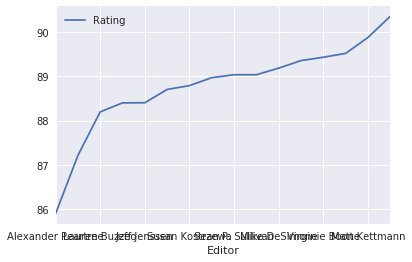

In [83]:
# Editor differences
#plt.plot(df2[['Rating','Editor']].groupby('Editor').mean())
editors = df2[['Rating','Editor']].groupby('Editor').mean()
editors.sort_values('Rating')

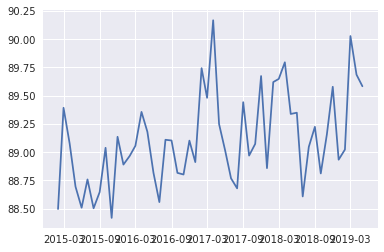

In [94]:
plt.plot(df[['RatingDate','Rating']].groupby('RatingDate').mean())

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96136 entries, 0 to 96135
Data columns (total 9 columns):
URL           96136 non-null object
Name          96136 non-null object
Rating        96136 non-null int64
Price         90794 non-null object
Region        96136 non-null object
Alcohol       92935 non-null object
Color         96136 non-null object
RatingDate    96136 non-null datetime64[ns]
Editor        41066 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.6+ MB


In [31]:
len(df) == len(df.drop_duplicates())

True

In [217]:
# drop incomplete data
df.dropna(inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96136 entries, 0 to 96135
Data columns (total 9 columns):
URL           96136 non-null object
Name          96136 non-null object
Rating        96136 non-null int64
Price         90794 non-null object
Region        96136 non-null object
Alcohol       92935 non-null object
Color         96136 non-null object
RatingDate    96136 non-null object
Editor        41066 non-null object
dtypes: int64(1), object(8)
memory usage: 6.6+ MB


In [76]:
df.head()

,URL,Name,Rating,Price,Region,Alcohol,Color,RatingDate,Editor
0,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2012 All Profits to Charity R...,89,$18,California Other,13.8%,Red,2016-12-31,Jim Gordon
1,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2014 All Profits to Charity S...,84,$18,California Other,13.5%,White,2016-12-31,Jim Gordon
2,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2015 Moscato (California),86,$18,California Other,12.2%,White,2017-02-01,NaN
3,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,91,$19,Mendocino County,15.2%,Red,2016-03-01,Jim Gordon
4,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2014 Bourbon Barrel Aged Batch No...,90,$19,California Other,15.6%,Red,2017-07-01,NaN


In [84]:
# Transform price column
df["Price"] = df["Price"].apply(lambda x : round(float(str(x).replace("$","").strip()),0))


In [85]:
# Transform price column
df["Alcohol"] = df["Alcohol"].apply(lambda x : round(float(str(x).replace("%","").strip()),1))


In [86]:
# Bin by price of $10
#df["Bin"] = df["Price"].apply(lambda x : round(x/,-1))

# Bin by price of $5
df["Bin"] = df["Price"].apply(lambda x : round(x/5,0)*5 )



In [87]:
# Ratings 
def ClassifyRating(x):
    if x >= 98:
        return 'Classic'
    elif x >= 94:
        return 'Superb'
    elif x >= 90:
        return 'Excellent'
    elif x >= 87:
        return 'Very good'
    elif x >= 83:
        return 'Good'
    elif x >= 80:
        return 'Acceptable'
    else:
        return 'Unacceptable'

df["Class"] = df["Rating"].apply(ClassifyRating)
    
    
"""
98–100 Classic The pinnacle of quality.
94–97 Superb A great achievement.
90–93 Excellent Highly recommended.
87–89 Very Good Often good value; well recommended.
83–86 Good Suitable for everyday consumption; often good value.
80–82 Acceptable Can be employed in casual, less-critical circumstances.
"""

'\n98–100 Classic The pinnacle of quality.\n94–97 Superb A great achievement.\n90–93 Excellent Highly recommended.\n87–89 Very Good Often good value; well recommended.\n83–86 Good Suitable for everyday consumption; often good value.\n80–82 Acceptable Can be employed in casual, less-critical circumstances.\n'

In [72]:
scores = df[df.Price <= 30][["Class","Price", "Rating"]].groupby("Class").mean()

scores.sort_values("Rating", ascending=False)

,Price,Rating
Class,,
Superb,26.673729,94.283898
Excellent,23.150734,90.782181
Very good,19.720954,87.913889
Good,16.446158,85.099343
Acceptable,15.449682,81.485350


In [60]:
# Check dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 89707 entries, 0 to 96135
Data columns (total 11 columns):
URL           89707 non-null object
Name          89707 non-null object
Rating        89707 non-null int64
Price         89707 non-null float64
Region        89707 non-null object
Alcohol       88275 non-null float64
Color         89707 non-null object
RatingDate    89707 non-null object
Editor        38262 non-null object
Bin           89707 non-null float64
Class         89707 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 10.7+ MB


In [38]:
df.describe()

,Rating,Price,Alcohol,Bin
count,96136.000000,90794.000000,92935.000000,90794.000000
mean,89.136369,37.957112,13.954368,38.026026
std,2.901773,48.278231,37.201765,48.293245
min,80.000000,4.000000,1.400000,5.000000
25%,87.000000,18.000000,13.000000,20.000000
50%,89.000000,28.000000,13.500000,30.000000
75%,91.000000,45.000000,14.400000,45.000000
max,100.000000,5000.000000,8333.000000,5000.000000


In [42]:
# see counts by bin
counts = df[["Bin","Rating"]].groupby('Bin').count()

counts[counts.index <= 160]


,Rating
Bin,
5.0,283
10.0,6345
15.0,13279
20.0,13983
25.0,10244
30.0,9035
35.0,5858
40.0,6432
45.0,3969


In [41]:
# delete all wines with prices over $1000
df = df[(df.Price <= 150) & (df.Price > 0.75)]
#df = df[df.Alcohol <= 50]



/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


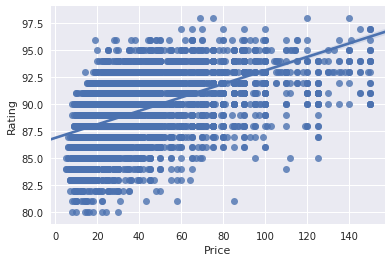

In [43]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline
sns.regplot(x="Price", y="Rating", data=df.sample(frac=0.1))


/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


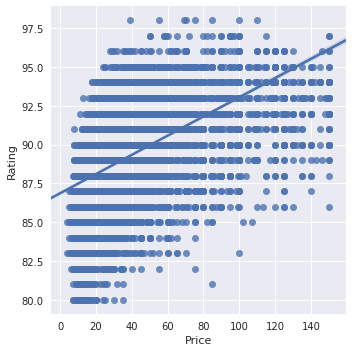

In [44]:
sns.lmplot(x="Price", y="Rating", data=df.sample(frac=0.2))

/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


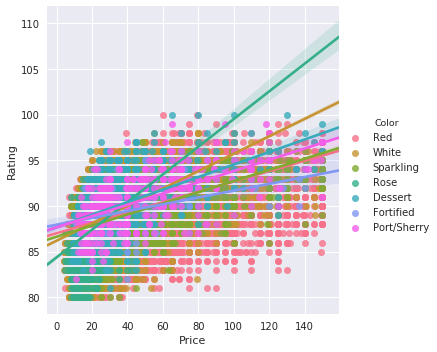

In [45]:
sns.lmplot(x="Price", y="Rating", hue="Color", data=df)

In [296]:
df.Price.value_counts().sort_index()

8.0      201
9.0      322
10.0     965
11.0     512
12.0    1307
13.0    1255
14.0    1125
15.0    2347
16.0    1279
17.0    1234
18.0    1822
19.0    1102
20.0    2939
21.0     481
22.0    1433
23.0     727
24.0    1114
25.0    2733
26.0     702
27.0     562
28.0    1249
29.0     603
30.0    2254
31.0     120
32.0     896
33.0     333
34.0     440
35.0    1685
36.0     621
37.0     203
38.0     808
39.0     407
40.0    1734
41.0      73
42.0     647
43.0     140
44.0     291
45.0    1519
46.0     217
47.0     121
48.0     595
49.0     274
50.0    1622
51.0      37
52.0     240
53.0      65
54.0     173
55.0     907
56.0     134
57.0      59
58.0     225
59.0     109
60.0    1159
61.0      17
62.0     144
63.0      69
64.0      68
65.0     960
66.0      73
67.0      47
Name: Price, dtype: int64

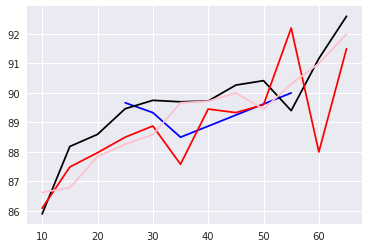

In [23]:
# plot mean by region
plt.plot(df[df.Region == 'Northwestern Italy'][["Bin","Rating"]].groupby('Bin').mean(), color='blue')
plt.plot(df[df.Region == 'Northeastern Italy'][["Bin","Rating"]].groupby('Bin').mean(), color='black')
plt.plot(df[df.Region == 'Central Italy'  ][["Bin","Rating"]].groupby('Bin').mean(), color='red')
plt.plot(df[df.Region == 'Southern Italy' ][["Bin","Rating"]].groupby('Bin').mean(), color='pink')



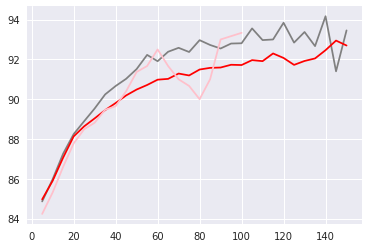

In [46]:
# plot mean by colour
plt.plot(df[df.Color == 'White'][["Bin","Rating"]].groupby('Bin').mean(), color='grey')
plt.plot(df[df.Color == 'Red'  ][["Bin","Rating"]].groupby('Bin').mean(), color='red')
plt.plot(df[df.Color == 'Rose' ][["Bin","Rating"]].groupby('Bin').mean(), color='pink')



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


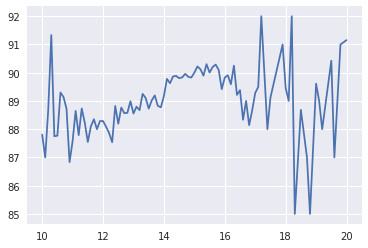

In [49]:
# plot mean by bin
plt.plot(df[df.Alcohol <= 20][df.Alcohol >= 10][["Rating", "Alcohol"]].groupby("Alcohol").mean())
#counts.sort_values('Alchol')

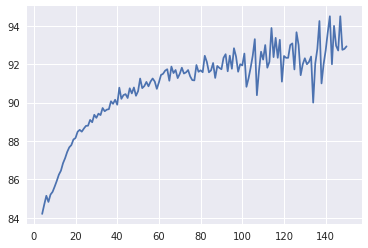

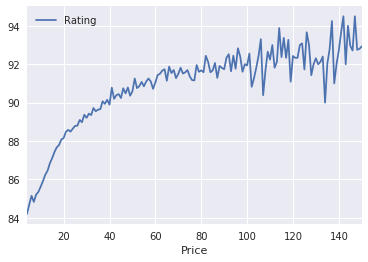

In [90]:
#print(df[df.Price <= 100][["Bin","Rating"]].groupby('Bin').mean())

#plt.plot(df[df.Price <= 150][["Price","Rating"]].groupby('Price').mean())
df[df.Price <= 150][["Price","Rating"]].groupby('Price').mean().plot()

In [53]:
df[["Rating","Color"]].groupby("Color").mean().sort_values('Rating', ascending=False)

,Rating
Color,
Port/Sherry,90.565534
Dessert,90.402743
Fortified,89.605634
Red,89.254872
Sparkling,89.064567
White,88.778497
Rose,87.251755


In [91]:
df[df.Rating == 100][["Price","Rating"]].groupby('Rating').mean()

,Price
Rating,
100,520.555556
